<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information: 

**male:** Gender of patient: male(1) or female(0) 

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

1. **[Logistic Regression Model](#logreg)**
2. **[Model Evaluation Metrics](#mod_eval)**
3. **[Performance Evaluation Metrics](#perf_eval)**
4. **[Determining optimal threshold](#opt)**

**Import the required libraries**

In [137]:
# type your code here
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

#### Load the csv file

In [138]:
# type your code here
df = pd.read_csv('Heart_disease.csv')
df = df.sample(frac = 1, random_state=4).reset_index(drop=True)
df = df.fillna(method='ffill')
y = df['CVD']
X = df.drop('CVD',axis=1)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,0,67,1.0,1,3.0,0.0,0,1,0,270.0,137.5,72.5,35.01,85.0,73.0,0
1,1,51,4.0,0,0.0,0.0,0,0,0,260.0,127.5,92.0,32.98,56.0,93.0,0
2,0,48,3.0,1,9.0,0.0,0,1,0,266.0,155.0,100.0,27.86,75.0,84.0,0
3,0,44,3.0,1,20.0,0.0,0,1,0,284.0,143.0,92.0,21.19,84.0,88.0,0
4,0,64,2.0,0,0.0,0.0,0,1,0,279.0,172.0,87.0,24.01,80.0,70.0,0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


### Let's begin with some hands-on practice exercises

<a id="logreg"> </a>
## 1. Logistic regression model

## We shall use the heart disease dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are all the classes of target variable 'CVD' fairly represented by records in the considered dataset ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [140]:
# type your code here
df['CVD'].value_counts()

0    3596
1     644
Name: CVD, dtype: int64

In [141]:
df['CVD'].value_counts(normalize=True)

0    0.848113
1    0.151887
Name: CVD, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Predict whether or not a patient will have cardiovascular disease based on the information about blood pressure of the patient. Columns related to blood pressure are diaBP, sysBP and BPMeds.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [142]:
# type your code here
import statsmodels.api as sm
x1 = X[['diaBP','sysBP','BPMeds']]
x1c = sm.add_constant(x1)

model = sm.Logit(y,x1c).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.404167
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4236
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Mar 2021   Pseudo R-squ.:                 0.05118
Time:                        22:40:17   Log-Likelihood:                -1713.7
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 7.810e-40
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6036      0.305    -15.086      0.000      -5.202      -4.006
diaBP         -0.0108      0.005     -1.984      0.047      -0.021      -0.000
sysBP          0.0277      0.003      9.568      0.000       0.022       0.033
BPMeds         0.3014      0.212      1.424      0.155      -0.114       0.716
==============================================================================
"""

In [143]:
import statsmodels.api as sm
x1 = X[['diaBP','sysBP']]
x1c = sm.add_constant(x1)

model = sm.Logit(y,x1c).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.404399
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4237
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Mar 2021   Pseudo R-squ.:                 0.05064
Time:                        22:40:17   Log-Likelihood:                -1714.7
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 1.916e-40
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6846      0.300    -15.632      0.000      -5.272      -4.097
diaBP         -0.0109      0.005     -2.003      0.045      -0.022      -0.000
sysBP          0.0285      0.003      9.989      0.000       0.023       0.034
==============================================================================
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Predict whether or not a patient has cardiovascular disease using the categorical variables in the dataset. How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [144]:
# type your code here
cols = list(X.columns)
cat_cols= []

for col in cols:
    print(col,X[col].nunique())
    if X[col].nunique()==2:
        cat_cols.append(col)
     

male 2
age 39
education 4
currentSmoker 2
cigsPerDay 33
BPMeds 2
prevalentStroke 2
prevalentHyp 2
diabetes 2
totChol 248
sysBP 234
diaBP 146
BMI 1364
heartRate 73
glucose 143


In [145]:
import statsmodels.api as sm
x1 = X[cat_cols]
x1c = sm.add_constant(x1)

model = sm.Logit(y,x1c).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.402964
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Tue, 09 Mar 2021   Pseudo R-squ.:                 0.05400
Time:                        22:40:17   Log-Likelihood:                -1708.6
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 2.118e-39
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.4474      0.087    -28.055      0.000      -2.618      -2.276
male                0.4890      0.090      5.416      0.000       0.312       0.666
currentSmoker       0.1520      0.091      1.672      0.094      -0.026       0.330
BPMeds              0.4657      0.208      2.237      0.025       0.058       0.874
prevalentStroke     1.0735      0.423      2.537      0.011       0.244       1.903
prevalentHyp        0.9161      0.092      9.973      0.000       0.736       1.096
diabetes            1.0462      0.210      4.977      0.000       0.634       1.458
===================================================================================
"""

In [146]:
cat_cols.remove('currentSmoker')

In [147]:
x1 = X[cat_cols]
x1c = sm.add_constant(x1)

model = sm.Logit(y,x1c).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.403294
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4234
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 Mar 2021   Pseudo R-squ.:                 0.05323
Time:                        22:40:17   Log-Likelihood:                -1710.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 1.275e-39
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.3788      0.076    -31.195      0.000      -2.528      -2.229
male                0.5207      0.088      5.898      0.000       0.348       0.694
BPMeds              0.4600      0.208      2.210      0.027       0.052       0.868
prevalentStroke     1.0514      0.422      2.489      0.013       0.223       1.879
prevalentHyp        0.9010      0.091      9.866      0.000       0.722       1.080
diabetes            1.0246      0.210      4.883      0.000       0.613       1.436
===================================================================================
"""

In [148]:
pd.DataFrame({'coeffs':model.params,'exp_coeffs':np.exp(model.params)})

,coeffs,exp_coeffs
const,-2.378780,0.092664
male,0.520713,1.683228
BPMeds,0.460031,1.584123
prevalentStroke,1.051389,2.861622
prevalentHyp,0.901023,2.462122
diabetes,1.024570,2.785896


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Predit if a patient has cardiovascular disease based on whether or not the patient has history of hypertension. Calculate the odds ratio.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [149]:
# type your code here
x1 = X[['BPMeds','prevalentHyp','sysBP','diaBP']]

x1c = sm.add_constant(x1)

model = sm.Logit(y,x1c).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.403185
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4235
Method:                           MLE   Df Model:                            4
Date:                Tue, 09 Mar 2021   Pseudo R-squ.:                 0.05349
Time:                        22:40:17   Log-Likelihood:                -1709.5
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 1.087e-40
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.9865      0.371    -10.752      0.000      -4.713      -3.260
BPMeds           0.2361      0.210      1.125      0.260      -0.175       0.647
prevalentHyp     0.3643      0.126      2.899      0.004       0.118       0.611
sysBP            0.0237      0.003      7.426      0.000       0.017       0.030
diaBP           -0.0132      0.005     -2.413      0.016      -0.024      -0.002
================================================================================
"""

In [150]:
x1 = X[['prevalentHyp','sysBP','diaBP']]

x1c = sm.add_constant(x1)

model = sm.Logit(y,x1c).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.403331
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4236
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Mar 2021   Pseudo R-squ.:                 0.05314
Time:                        22:40:17   Log-Likelihood:                -1710.1
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 2.299e-41
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.0259      0.369    -10.903      0.000      -4.750      -3.302
prevalentHyp     0.3775      0.125      3.023      0.003       0.133       0.622
sysBP            0.0241      0.003      7.610      0.000       0.018       0.030
diaBP           -0.0134      0.005     -2.446      0.014      -0.024      -0.003
================================================================================
"""

In [151]:
pd.DataFrame({'coeffs':model.params,'exp_coeffs':np.exp(model.params)})

,coeffs,exp_coeffs
const,-4.025854,0.017848
prevalentHyp,0.377546,1.458700
sysBP,0.024108,1.024401
diaBP,-0.013350,0.986739


<a id="mod_eval"> </a>
## 2. Model Evaluation Metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a full model to predict if a patient will have a cardiovascular disease. Find the value of Mcfadden's R<sup>2</sup>.
                </font>
            </div>
        </td>
    </tr>
</table>

In [152]:
# type your code here
y = df['CVD']
X = df.drop('CVD',axis=1)

xc = sm.add_constant(X)

model = sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.379013
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Tue, 09 Mar 2021   Pseudo R-squ.:                  0.1102
Time:                        22:40:17   Log-Likelihood:                -1607.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 1.672e-75
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.0321      0.659    -12.181      0.000      -9.325      -6.740
male                0.5092      0.100      5.082      0.000       0.313       0.706
age                 0.0625      0.006     10.056      0.000       0.050       0.075
education          -0.0025      0.046     -0.055      0.956      -0.092       0.087
currentSmoker       0.0248      0.143      0.173      0.863      -0.256       0.306
cigsPerDay          0.0204      0.006      3.605      0.000       0.009       0.031
BPMeds              0.2259      0.219      1.030      0.303      -0.204       0.656
prevalentStroke     0.9705      0.442      2.196      0.028       0.104       1.837
prevalentHyp        0.2304      0.128      1.794      0.073      -0.021       0.482
diabetes            0.3608      0.277      1.302      0.193      -0.182       0.904
totChol             0.0018      0.001      1.745      0.081      -0.000       0.004
sysBP               0.0142      0.004      4.014      0.000       0.007       0.021
diaBP              -0.0030      0.006     -0.510      0.610      -0.015       0.009
BMI                 0.0040      0.012      0.343      0.732      -0.019       0.027
heartRate          -0.0012      0.004     -0.303      0.762      -0.009       0.006
glucose             0.0048      0.002      2.526      0.012       0.001       0.009
===================================================================================
"""

In [153]:
from sklearn.metrics import roc_curve
y_prob = model.predict(xc)
fpr5,tpr5,thresholds5 = roc_curve(y,y_prob)
y_prob_df = pd.DataFrame(y_prob,columns=['prob']) 
y_prob_df['y'] = y

In [154]:
y_prob_df.head()

,prob,y
0,0.283282,0
1,0.137035,0
2,0.141296,0
3,0.123189,0
4,0.311239,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the significant variables in the full model when all the variables are considered in prediction of whether or not a patient has cardiovascular disease.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [155]:
# type your code here

#  Backward Elimination to remove variable
cols = list(xc.columns)
while(len(cols)>0):
    x1 = xc[cols]
    model = sm.Logit(y,x1).fit()
    p = model.pvalues
    p.drop('const')
    pmax = max(p)
    feature_pmax = p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_pmax)
        print('Removed: ',feature_pmax,'prob: ',pmax)
    else:
        break
        
selected_cols = cols
print(cols)

Optimization terminated successfully.
         Current function value: 0.379013
         Iterations 7
Removed:  education prob:  0.9562658567758225
Optimization terminated successfully.
         Current function value: 0.379014
         Iterations 7
Removed:  currentSmoker prob:  0.8624464942249597
Optimization terminated successfully.
         Current function value: 0.379017
         Iterations 7
Removed:  heartRate prob:  0.7670454404536778
Optimization terminated successfully.
         Current function value: 0.379028
         Iterations 7
Removed:  BMI prob:  0.7403040394136801
Optimization terminated successfully.
         Current function value: 0.379041
         Iterations 7
Removed:  diaBP prob:  0.6291205870464592
Optimization terminated successfully.
         Current function value: 0.379068
         Iterations 7
Removed:  BPMeds prob:  0.2915731791810592
Optimization terminated successfully.
         Current function value: 0.379197
         Iterations 7
Removed:  diabetes 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How do the coefficients of each feature form the dataset impact the odds of a patient having a cardiovascular disease?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [156]:
# type your code here
x1 = xc[selected_cols]
model = sm.Logit(y,x1).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.380194
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Tue, 09 Mar 2021   Pseudo R-squ.:                  0.1075
Time:                        22:40:17   Log-Likelihood:                -1612.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 9.781e-81
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3706      0.386    -21.687      0.000      -9.127      -7.614
male                0.4896      0.097      5.048      0.000       0.300       0.680
age                 0.0650      0.006     10.989      0.000       0.053       0.077
cigsPerDay          0.0208      0.004      5.442      0.000       0.013       0.028
prevalentStroke     1.0476      0.436      2.404      0.016       0.194       1.902
sysBP               0.0171      0.002      8.567      0.000       0.013       0.021
glucose             0.0063      0.002      4.157      0.000       0.003       0.009
===================================================================================
"""

In [157]:
pd.DataFrame({'coeffs':model.params,'exp_coeffs':np.exp(model.params)})

,coeffs,exp_coeffs
const,-8.370603,0.000232
male,0.489574,1.631621
age,0.065010,1.067170
cigsPerDay,0.020824,1.021043
prevalentStroke,1.047553,2.850666
sysBP,0.017111,1.017258
glucose,0.006272,1.006291


<a id="perf_eval"> </a>
## 3. Performance evaluation metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>8. For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [158]:
# type your code here
y_prob = model.predict(x1)
y_prob = pd.DataFrame(y_prob,columns = ['prob'])
y_prob['y_estimate'] = y_prob['prob'].apply(lambda x:1 if x>=0.5 else 0)
y_prob['y'] = y


In [159]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_prob['y'],y_prob['y_estimate'])
cm

array([[3567,   29],
       [ 594,   50]], dtype=int64)

In [160]:
accuracy = (cm[0,0]+cm[1,1])/(cm.sum())
accuracy

0.8530660377358491

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.  Calculate value of kappa for the full model built in question 5. Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [161]:
# type your code here

from sklearn.metrics import cohen_kappa_score

y_prob = model.predict(x1)
y_prob = pd.DataFrame(y_prob,columns = ['prob'])
y_prob['y_estimate'] = y_prob['prob'].apply(lambda x:1 if x>=0.18 else 0)
y_prob['y'] = y


cohen_kappa_score(y_prob['y'],y_prob['y_estimate'])

0.24365927966485867

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Identify the features from the dataset that are involved in multicollinearity. After that, split the updated data using train_test_split.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [162]:
# type your code here
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf = [vif(xc.values,1) for i in range(xc.shape[1])]
pd.DataFrame(vf,index=xc.columns,columns=['VIF'])

,VIF
const,1.190526
male,1.190526
age,1.190526
education,1.190526
currentSmoker,1.190526
cigsPerDay,1.190526
BPMeds,1.190526
prevalentStroke,1.190526
prevalentHyp,1.190526
diabetes,1.190526


In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Use the data obtained from Q10 and identify 5 features that contribute most in the prediction of target variable.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [164]:
# type your code here

xc = sm.add_constant(X)
model = sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.379013
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Tue, 09 Mar 2021   Pseudo R-squ.:                  0.1102
Time:                        22:40:17   Log-Likelihood:                -1607.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 1.672e-75
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.0321      0.659    -12.181      0.000      -9.325      -6.740
male                0.5092      0.100      5.082      0.000       0.313       0.706
age                 0.0625      0.006     10.056      0.000       0.050       0.075
education          -0.0025      0.046     -0.055      0.956      -0.092       0.087
currentSmoker       0.0248      0.143      0.173      0.863      -0.256       0.306
cigsPerDay          0.0204      0.006      3.605      0.000       0.009       0.031
BPMeds              0.2259      0.219      1.030      0.303      -0.204       0.656
prevalentStroke     0.9705      0.442      2.196      0.028       0.104       1.837
prevalentHyp        0.2304      0.128      1.794      0.073      -0.021       0.482
diabetes            0.3608      0.277      1.302      0.193      -0.182       0.904
totChol             0.0018      0.001      1.745      0.081      -0.000       0.004
sysBP               0.0142      0.004      4.014      0.000       0.007       0.021
diaBP              -0.0030      0.006     -0.510      0.610      -0.015       0.009
BMI                 0.0040      0.012      0.343      0.732      -0.019       0.027
heartRate          -0.0012      0.004     -0.303      0.762      -0.009       0.006
glucose             0.0048      0.002      2.526      0.012       0.001       0.009
===================================================================================
"""

In [165]:
#  Backward Elimination to remove variable
cols = list(xc.columns)
while(len(cols)>0):
    x1 = xc[cols]
    model = sm.Logit(y,x1).fit()
    p = model.pvalues
    p.drop('const')
    pmax = max(p)
    feature_pmax = p.idxmax()
    if (pmax>0.01): # we reduce to 0.01 to get the 6 outcomes
        cols.remove(feature_pmax)
        print('Removed: ',feature_pmax,'prob: ',pmax)
    else:
        break
        
selected_cols = cols
print(cols)

Optimization terminated successfully.
         Current function value: 0.379013
         Iterations 7
Removed:  education prob:  0.9562658567758225
Optimization terminated successfully.
         Current function value: 0.379014
         Iterations 7
Removed:  currentSmoker prob:  0.8624464942249597
Optimization terminated successfully.
         Current function value: 0.379017
         Iterations 7
Removed:  heartRate prob:  0.7670454404536778
Optimization terminated successfully.
         Current function value: 0.379028
         Iterations 7
Removed:  BMI prob:  0.7403040394136801
Optimization terminated successfully.
         Current function value: 0.379041
         Iterations 7
Removed:  diaBP prob:  0.6291205870464592
Optimization terminated successfully.
         Current function value: 0.379068
         Iterations 7
Removed:  BPMeds prob:  0.2915731791810592
Optimization terminated successfully.
         Current function value: 0.379197
         Iterations 7
Removed:  diabetes 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a model using the features obtained in question 11. For the model find: 
                        <ol>                       
                         <li>Accuracy</li>
                        <li>F<sub>1</sub> score</li>
                        </ol>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [166]:
# type your code here
x1 = X[['male', 'age', 'cigsPerDay', 'sysBP', 'glucose']]
x1c = sm.add_constant(x1)
model = sm.Logit(y,x1c).fit()
model.summary()
from sklearn.metrics import roc_curve
y_prob = model.predict(x1c)
fpr12,tpr12,thresholds12 = roc_curve(y,y_prob)

Optimization terminated successfully.
         Current function value: 0.380841
         Iterations 7


In [167]:
from sklearn.metrics import accuracy_score,f1_score

In [168]:
y_prob = model.predict(x1c)
y_prob = pd.DataFrame(y_prob,columns = ['prob'])
y_prob['y_estimate'] = y_prob['prob'].apply(lambda x:1 if x>=0.5 else 0)
y_prob['y'] = y


In [169]:
# confusion_matrix(y_prob['y'],y_prob['y_estimate'])

In [170]:
accuracy_score(y_prob['y'],y_prob['y_estimate'])

0.8516509433962264

In [171]:
f1_score(y_prob['y'],y_prob['y_estimate'])

0.11781206171107995

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Compare the full model in question 5 and the model built in question 12 using their ROC curves. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

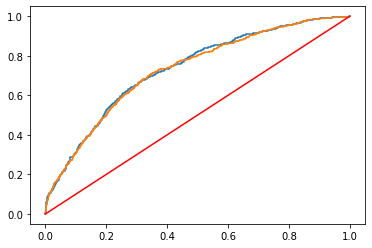

In [172]:
# type your code here
plt.plot(fpr5,tpr5)
plt.plot(fpr12,tpr12)
plt.plot(fpr5,fpr5,'r')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a logistic regression model using information about heart rate of the patients. Compute the AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [173]:
# type your code here
x1 = X[['heartRate']]
x1c = sm.add_constant(x1)
model = sm.Logit(y,x1c).fit()
y_prob = model.predict(x1c)
model.summary()



Optimization terminated successfully.
         Current function value: 0.425718
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4238
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Mar 2021   Pseudo R-squ.:               0.0005878
Time:                        22:40:18   Log-Likelihood:                -1805.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                    0.1451
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1112      0.272     -7.769      0.000      -2.644      -1.579
heartRate      0.0051      0.004      1.463      0.143      -0.002       0.012
==============================================================================
"""

In [174]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y,y_prob)

0.5140237341006916

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the cross entropy for the model built in question 14.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compare the model built in question 14 to the full model built in question 5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What is the cross entropy for the full model? Use the full model in Q5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Predict whether a patient has cardiovascular disease based on smoking habits of the patient. For the model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [181]:
# type your code here
y = df['CVD']
X = df.drop('CVD',axis=1)
import statsmodels.api as sm

xc = sm.add_constant(X)
model = sm.Logit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.379013
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Tue, 09 Mar 2021   Pseudo R-squ.:                  0.1102
Time:                        22:47:30   Log-Likelihood:                -1607.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 1.672e-75
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.0321      0.659    -12.181      0.000      -9.325      -6.740
male                0.5092      0.100      5.082      0.000       0.313       0.706
age                 0.0625      0.006     10.056      0.000       0.050       0.075
education          -0.0025      0.046     -0.055      0.956      -0.092       0.087
currentSmoker       0.0248      0.143      0.173      0.863      -0.256       0.306
cigsPerDay          0.0204      0.006      3.605      0.000       0.009       0.031
BPMeds              0.2259      0.219      1.030      0.303      -0.204       0.656
prevalentStroke     0.9705      0.442      2.196      0.028       0.104       1.837
prevalentHyp        0.2304      0.128      1.794      0.073      -0.021       0.482
diabetes            0.3608      0.277      1.302      0.193      -0.182       0.904
totChol             0.0018      0.001      1.745      0.081      -0.000       0.004
sysBP               0.0142      0.004      4.014      0.000       0.007       0.021
diaBP              -0.0030      0.006     -0.510      0.610      -0.015       0.009
BMI                 0.0040      0.012      0.343      0.732      -0.019       0.027
heartRate          -0.0012      0.004     -0.303      0.762      -0.009       0.006
glucose             0.0048      0.002      2.526      0.012       0.001       0.009
===================================================================================
"""

In [182]:
y_prob = model.predict(xc)
y_prob = pd.DataFrame(y_prob)
y_prob.columns = ['prob']
y_prob['y'] = y
y_prob['y_estimate'] = y_prob['prob'].apply(lambda x: 1 if x>=0.5 else 0)

In [184]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_prob['y'],y_prob['y_estimate'])
cm

array([[3575,   21],
       [ 592,   52]], dtype=int64)

In [189]:
precision = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,0]+cm[1,1])
F1_score = 2*((recall*precision)/(recall+precision))
print('Precision:-',precision)
print('Recall:-',recall)
print('F1-score:-',F1_score)


Precision:- 0.7123287671232876
Recall:- 0.08074534161490683
F1-score:- 0.14504881450488144


<a id="opt"> </a>
## 4. Determining optimal threshold

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the optimal value threshold for the full model using the Youden's index.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [102]:
# type your code here
yi = pd.DataFrame({'tpr':tpr5,'fpr':fpr5,'thresholds':thresholds5})
yi['diff'] = yi['tpr'] - yi['fpr']
yi = yi.sort_values(by='diff',ascending=False)
yi.head()

,tpr,fpr,thresholds,diff
570,0.669255,0.309511,0.156116,0.359744
532,0.633540,0.273915,0.170723,0.359625
514,0.613354,0.253893,0.178684,0.359461
538,0.638199,0.278921,0.168778,0.359278
568,0.667702,0.308676,0.156821,0.359026


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the costs of false negatives and false positives as 3 and 1.3 respectively to obtain the optimal cut-off probability for which the total cost will be minimum.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [124]:
# type your code here
cost_all=[]
ii_all = []
for i in range(1,100,1):
    
    ii = i/100
    y_prob_df['y_estimate'] = y_prob_df['prob'].apply(lambda x:1 if x>=ii else 0)
    cm = confusion_matrix(y_prob_df['y'],y_prob_df['y_estimate'])
    cost = cm[0,1]*1.3+cm[1,0]*3
    cost_all.append(cost)
    ii_all.append(ii)
    

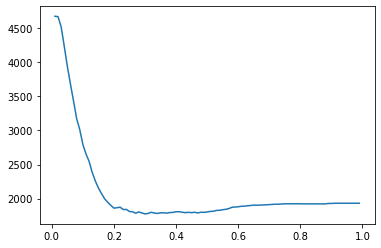

In [126]:
plt.plot(ii_all,cost_all)
plt.show()

In [134]:
cost = pd.DataFrame({'cost':cost_all,'Thresholds':ii_all})
cost = cost.sort_values(by='cost')
cost.head()

,cost,Thresholds
29,1775.8,0.30
30,1782.7,0.31
33,1783.3,0.34
26,1786.4,0.27
36,1786.9,0.37
